In [8]:
from astropy.io.votable import parse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def parse_votable_to_dataframe(votable_path):
    """
    Parses a VOTable file and converts it to a Pandas DataFrame.

    Parameters:
    votable_path (str): The file path to the VOTable (.vot) file.

    Returns:
    pd.DataFrame: A Pandas DataFrame containing the data from the VOTable.
    """
    
    votable = parse(votable_path)
    table = votable.get_first_table().to_table()
    df = table.to_pandas()
    print(f"Number of stars returned from the initial query: {len(df)}")
    return df

In [10]:
def save_to_csv(df, csv_path):
    """
    Saves a Pandas DataFrame to a CSV file.

    Parameters:
    df (pd.DataFrame): The DataFrame to be saved.
    csv_path (str): The file path where the CSV should be saved.

    Returns:
    None
    """
    
    df.to_csv(csv_path, index=False)
    print(f"Data saved to {csv_path}")

In [11]:
def filter_good_data(df):
    """
    Filters stars with good 2MASS photometry (ph_qual == 'AAA') and positive parallaxes.

    Parameters:
    df (pd.DataFrame): The original DataFrame with the raw data.

    Returns:
    pd.DataFrame: A DataFrame containing only stars with good 2MASS photometry and positive parallax.
    """
    
    bad_photometry = df[df['ph_qual'] != 'AAA']
    print(f"Number of stars with bad 2MASS photometry: {len(bad_photometry)}")

    non_positive_parallax = df[df['parallax'] <= 0]
    print(f"Number of stars with non-positive parallaxes: {len(non_positive_parallax)}")
    
    filtered = df[(df['ph_qual'] == 'AAA') & (df['parallax'] > 0)]
    print(f"Number of stars after applying quality cuts: {len(filtered)}")
    return filtered

In [12]:
def calculate_absolute_g_magnitude(df):
    """
    Calculates the absolute G magnitude for stars in the DataFrame using the parallax.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the photometric and parallax data.

    Returns:
    pd.DataFrame: The DataFrame with an additional column 'absolute_g' for absolute G magnitude.
    """
    
    df['absolute_g'] = df['phot_g_mean_mag'] - 5 * (np.log10(1000 / df['parallax']) - 1)
    return df

In [13]:
def plot_cmds(filtered_data, save_path):
    """
    Creates and saves a figure with two color-magnitude diagrams (CMDs): 
    - Gaia BP-RP vs Absolute G Magnitude
    - 2MASS J-Ks vs Apparent Ks Magnitude

    Parameters:
    filtered_data (pd.DataFrame): The cleaned and filtered DataFrame with required columns.
    save_path (str): The file path where the figure should be saved.

    Returns:
    None
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # Create figure with 2 subplots

    # Gaia BP-RP vs Absolute G Magnitude
    ax[0].scatter(filtered_data['bp_rp'], filtered_data['absolute_g'], s=10, c='blue', edgecolor='k', alpha=0.7)
    ax[0].invert_yaxis()  # Invert y-axis for magnitude
    ax[0].set_xlabel('BP - RP')
    ax[0].set_ylabel('Absolute G Magnitude')
    ax[0].set_title('Gaia CMD (BP-RP vs Absolute G Magnitude)')
    ax[0].grid(True)

    # 2MASS J-Ks vs Apparent Ks Magnitude
    ax[1].scatter(filtered_data['j_m'] - filtered_data['ks_m'], filtered_data['ks_m'], s=10, c='red', edgecolor='k', alpha=0.7)
    ax[1].invert_yaxis()  # Invert y-axis for magnitude
    ax[1].set_xlabel('J - Ks')
    ax[1].set_ylabel('Apparent Ks Magnitude')
    ax[1].set_title('2MASS CMD (J-Ks vs Apparent Ks Magnitude)')
    ax[1].grid(True)

    # Tight layout for better spacing between plots
    plt.tight_layout()

    # Save the figure
    plt.savefig(save_path, dpi=200)  # Higher dpi for better quality
    print(f"Figure saved to {save_path}")

    # Show the figure
    plt.show()

Number of stars returned from the initial query: 1018
Data saved to /Users/shaniatham/ASTR4004/astro_computing/ASTR4004_U7392929/data/messier67_gaia_data.csv
Number of stars with bad 2MASS photometry: 21
Number of stars with non-positive parallaxes: 2
Number of stars after applying quality cuts: 988


/var/folders/hq/jjm583ks6d1gz_c4tzrnclkm0000gn/T/ipykernel_68796/2748993973.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['absolute_g'] = df['phot_g_mean_mag'] - 5 * (np.log10(1000 / df['parallax']) - 1)


Figure saved to /Users/shaniatham/ASTR4004/astro_computing/ASTR4004_U7392929/figures/cmd_M67_subplot.png


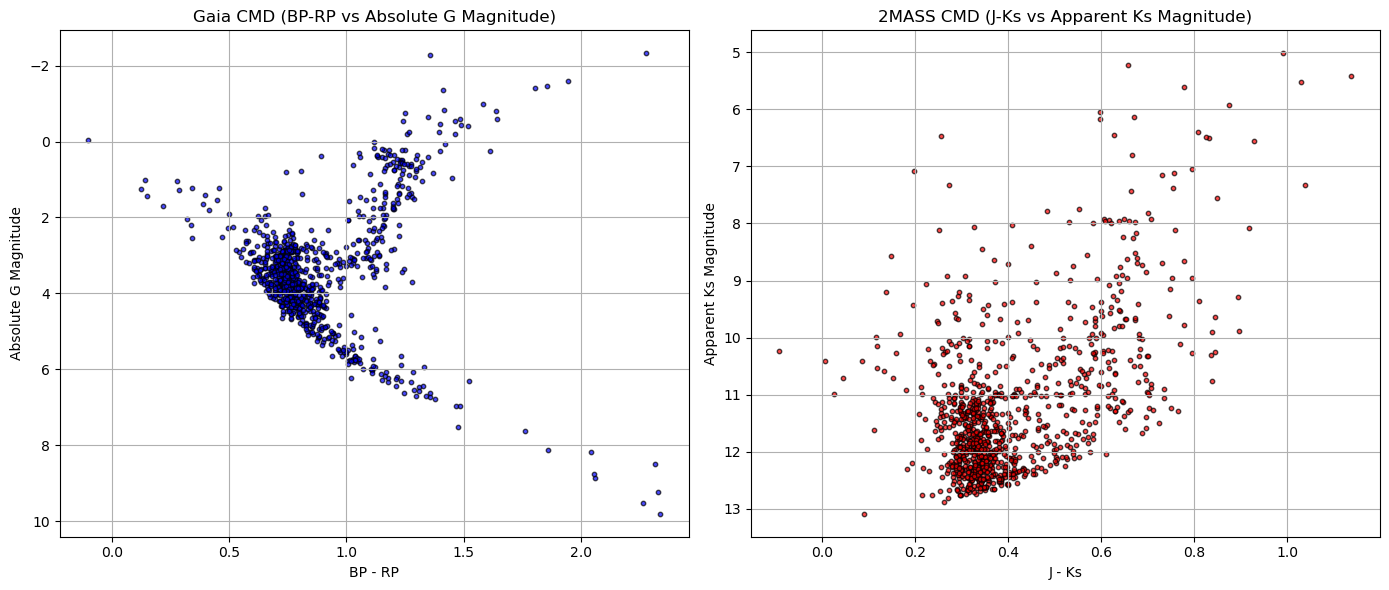

In [14]:
if __name__ == "__main__":
    
    # File paths
    votable_path = "/Users/shaniatham/ASTR4004/astro_computing/ASTR4004_U7392929/data/messier67-result (1).vot"
    csv_path = "/Users/shaniatham/ASTR4004/astro_computing/ASTR4004_U7392929/data/messier67_gaia_data.csv"
    figure_path = "/Users/shaniatham/ASTR4004/astro_computing/ASTR4004_U7392929/figures/cmd_M67_subplot.png"

    # Parse VOTable to DataFrame
    df = parse_votable_to_dataframe(votable_path)

    # Save the DataFrame to CSV
    save_to_csv(df, csv_path)

    # Filter good data
    filtered_data = filter_good_data(df)

    # Calculate absolute G magnitude
    filtered_data = calculate_absolute_g_magnitude(filtered_data)

    # Plot and save CMDs
    plot_cmds(filtered_data, figure_path)